#  Analyzing Flipkart sales dataset
---
---
## Name: Ojaswee

---
### Roll no.: 19211
---

### Department: DSE
---

---

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import ast
import plotly.express as px
from plotly import graph_objects as go

Importing the dataset

In [2]:
df = pd.read_csv(r"flipkart_com-ecommerce_sample.csv")

Printing the dataset

In [3]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

Checking the missing values

In [4]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

Replacing the missing values for "retail_price" and "discounted_price" first using the median imputation method

In [5]:
df["retail_price"].fillna(df["retail_price"].median(),inplace=True)
df["discounted_price"].fillna(df["discounted_price"].median(),inplace=True)

Adding another column to the dataset i.e. "discount_percentage"

In [6]:
x=df['retail_price']-df['discounted_price']
y=(x/df['retail_price'])*100
df['discount_percentage']=y

Extracting date, time and main_category from "crawl_timestamp" and "product_category_tree" respectively

In [7]:
df['timestamp']=pd.to_datetime(df['crawl_timestamp'])  #converting into datetime to extract date and time easily
df['Time']=df['timestamp'].apply(lambda x : x.time)  #extracting time
df['date']=df['timestamp'].apply(lambda x : x.date)  #extracting date
df.drop(['crawl_timestamp'], axis = 1,inplace=True)  #dropping the column
df['main_category']=df['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])  #new column using product_category_tree

In [8]:
df

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percentage,timestamp,Time,date,main_category
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Footwear
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Pet Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",51.333333,2015-12-01 10:15:43+00:00,10:15:43,2015-12-01,Baby Care
19996,71ac419198359d37b8fe5e3fffdfee09,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",20.013996,2015-12-01 10:15:43+00:00,10:15:43,2015-12-01,Baby Care
19997,93e9d343837400ce0d7980874ece471c,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium 

Extracting months from timestamp

In [9]:
df['timestamp'][0]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['sale_year'] = df['timestamp'].apply(lambda x: x.year)  #extracting year
df['sale_month'] = df['timestamp'].apply(lambda x: x.month) #extracting months

Creating a dictionary "months" and then converting sale_month values to sale_month names with it's help 

In [10]:
months = {1 : 'January',
         2 : 'February',
         3 : 'March',
         4 : 'April',
         5 : 'May',
         6 : 'June',
         7 : 'July',
         8 : 'August',
         9 : 'September',
         10 : 'October',
         11: 'November',
         12 : 'December'}

df['sale_month'] = df['sale_month'].map(months)

In [11]:
df.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,discount_percentage,timestamp,Time,date,main_category,sale_year,sale_month
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing,2016,March
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Furniture,2016,March
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Footwear,2016,March
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing,2016,March
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Pet Supplies,2016,March


Printing month wise sales values

In [12]:
monthly_sales = df['sale_month'].value_counts()
monthly_sales

December    10315
January      4850
March        1634
April        1137
June         1046
May           773
February      245
Name: sale_month, dtype: int64

## Month wise sales are:

In [13]:
import matplotlib.pyplot as plt # For plotting the points and graphs
import seaborn as sns # To visualize in coloful patterns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Products Monthly Sales')

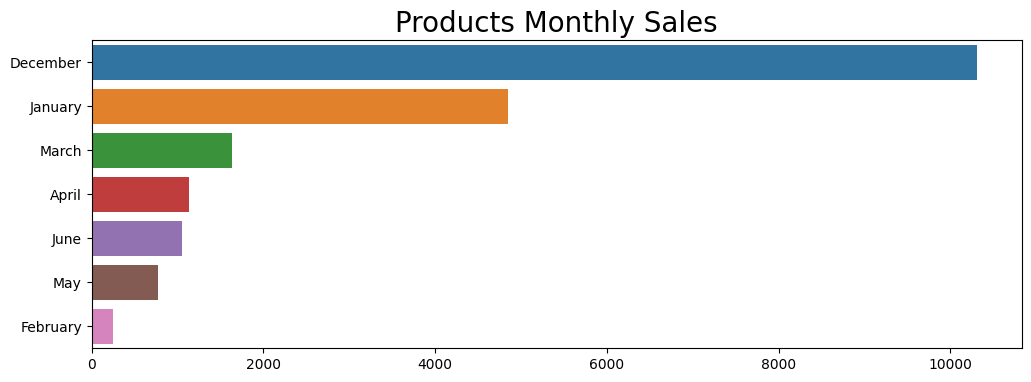

In [14]:
# Plot monthly distribution of sales
plt.figure(figsize=(12,4))
sns.barplot(x=monthly_sales.values, y=monthly_sales.index)
plt.title('Products Monthly Sales', fontsize=20)

## Time at which the are customers most active:

In [15]:
fig = px.line( x=df['Time'].sort_values(ascending=True), y = df['product_url'])
fig.update_layout(
    title_text='No. of clicks vs time', title_x=0.5, # title of plot
    xaxis_title_text='Time', # xaxis label
    yaxis_title_text='No. of Clicks', # yaxis label
)
fig.update_yaxes(showticklabels=False)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()

## Customers spending the most money are:

In [16]:
df_customer=df.groupby("uniq_id")[["discounted_price"]].sum().sort_values(by=['discounted_price'],ascending=[False]).reset_index()

#Top 20 customers spending the most
list1=df_customer[:20]

#plotting a bar graph
px.bar(list1, x= 'uniq_id', y="discounted_price",color='discounted_price')

### Cheapest product sold is:

In [17]:
print("The cheapest product sold at Rs.{}".format(int(df['discounted_price'].min())))

The cheapest product sold at Rs.35


In [18]:
df[df['discounted_price'] == df['discounted_price'].min()]

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,discount_percentage,timestamp,Time,date,main_category,sale_year,sale_month
10554,aa68675f50a0551b8dadb954017a50a1,http://www.flipkart.com/geol-wooden-wet-dry-br...,Geol Wooden Wet and Dry Broom,"[""Kitchen & Dining >> Housekeeping & Laundry >...",BMBEHPAGGDSSYMUZ,35.0,35.0,"[""http://img5a.flixcart.com/image/broom-brush/...",False,Specifications of Geol Wooden Wet and Dry Broo...,...,No rating available,Geol,"{""product_specification""=>[{""key""=>""Brand"", ""v...",0.0,2016-04-15 20:20:45+00:00,20:20:45,2016-04-15,Kitchen & Dining,2016,April


### Costliest Product sold is:

In [19]:
print("The costliest product sold at Rs.{}".format(int(df['discounted_price'].max())))

The costliest product sold at Rs.571230


In [20]:
df[df['discounted_price'] == df['discounted_price'].max()]

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,discount_percentage,timestamp,Time,date,main_category,sale_year,sale_month
116,329c5f4d7aced63e1ce3e88f41d5e7e6,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,"[""Watches >> Wrist Watches >> Breitling Wrist ...",WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,Breitling AB011010/BB08 131S Chronomat 44 Anal...,...,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",0.0,2015-12-04 07:25:36+00:00,07:25:36,2015-12-04,Watches,2015,December


## Brands offering highest discount are:

In [21]:
df_discount=df.query('discount_percentage > 90')  #targeting brands giving high discounts
df_discount=df_discount.dropna() #dropping rows with NA values
df_discount["brand"].replace('FashBlush','Fash Blush',inplace=True) #handling spelling errors
max_discount=pd.DataFrame(df_discount.groupby('brand')[['discount_percentage']].mean().sort_values(by=['discount_percentage'],ascending=False).reset_index())  #creating a dataframe

In [22]:
px.bar(max_discount, x= 'brand', y='discount_percentage',color='brand')  #plotting a bar graph

### Highest Discounted product is:

In [23]:
print("The highest discounted product sold at {}%".format(int(df['discount_percentage'].max())))

The highest discounted product sold at 96%


In [24]:
df[df['discount_percentage'] == df['discount_percentage'].max()]

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,discount_percentage,timestamp,Time,date,main_category,sale_year,sale_month
17205,139ab69f8f1df70f749f08ce34621a0e,http://www.flipkart.com/rajcrafts-floral-doubl...,Rajcrafts Floral Double Quilts & Comforters White,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAE8M4XVCTFD4JT,6000.0,208.0,"[""http://img5a.flixcart.com/image/blanket/4/j/...",False,Rajcrafts Floral Double Quilts & Comforters Wh...,...,No rating available,Rajcrafts,"{""product_specification""=>[{""key""=>""Brand"", ""v...",96.533333,2015-12-20 08:26:17+00:00,08:26:17,2015-12-20,Home Furnishing,2015,December


## Proportion of 5 star rated products to the total products are:

In [25]:
# 5 star rating

total_prod=len(df['pid'])  #total products using pid variable
total_ratings=len(df[df['product_rating']!='No rating available']) #total rated products
top_ratings=len(df[df['product_rating']=='5']) #5 star rated products
df_funnel_1 = dict(
    number=[total_prod,total_ratings,top_ratings],
    stage=["Total Products","Products with ratings","Products with 5 star rating"])
funnel_1_fig = px.funnel(df_funnel_1, x='number', y='stage')
funnel_1_fig.show()

## Number of best and worst-performing products and brands in terms of ratings are:


In [26]:
#5 star products/brands
rating_5=pd.DataFrame(df.loc[df['product_rating'] == '5'])
top_product_type=rating_5['main_category'].value_counts() #top products
top_brand_type=rating_5['brand'].value_counts()  #top brands

#top 5 products
df_top_product=pd.DataFrame(top_product_type[:5].reset_index()) #first 5
df_top_product.rename(columns = {'index':'top_prod'}, inplace = True) 
df_top_product.drop('main_category', inplace=True, axis=1)

#top 5 brands
df_top_brand=pd.DataFrame(top_brand_type[:5].reset_index())
df_top_brand.rename(columns = {'index':'top_brands'}, inplace = True)
df_top_brand.drop('brand', inplace=True, axis=1)
df_top_brand.head()

#concatenating the 2 tables
df_product_brand_rate5=pd.concat([df_top_product,df_top_brand],axis=1)


In [27]:
df.drop(df.index[df['product_rating'] == 'No rating available'], inplace = True) 
ratings=pd.DataFrame(df['product_rating'].value_counts().reset_index())
ratings['index'] = ratings['index'].astype(float)
ratings.head().sort_values(by=['index'],ascending=[False])
ratings.rename(columns = {'index':'Ratings','product_rating':'Counts'}, inplace = True)

#plotting the result
data=ratings
x=ratings['Ratings']
y=ratings['Counts']
figdot2 = go.Figure()
figdot2.add_trace(go.Scatter(
    x=x,
    y=y,
    marker=dict(color="black", size=12),
    mode="markers",
    name="ratings",
))

figdot2.update_layout(title="Ratings v/s Count",title_x=0.5,
                  xaxis_title="Ratings",
                  yaxis_title="Count",
                     )

figdot2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
figdot2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
figdot2.show()

## The top performing product categories and brands are:

In [28]:
# Top 10 main products being purchased

n = 10
top_products=pd.DataFrame(df['main_category'].value_counts()  [:n]).reset_index()
top_products.rename(columns = {'index':'Top_Products','main_category':'Total_Count'}, inplace = True)

#Top 10 main brands being purchased

n = 10
top_brands=pd.DataFrame(df['brand'].value_counts()[:n]).reset_index()
top_brands.rename(columns = {'index':'Top_Brands','brand':'Total_Count'}, inplace = True)

In [29]:
from plotly.subplots import make_subplots #plotly library to create subplots

label1 = top_products['Top_Products']
value1=top_products['Total_Count']
label2=top_brands['Top_Brands']
value2=top_brands['Total_Count']

# Creating subplots

fig_both = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_both.add_trace(go.Pie(labels=label1, values=value1, name="Top Products",pull=[0.3, 0, 0, 0]),
              1, 1,)
fig_both.add_trace(go.Pie(labels=label2, values=value2, name="Top Brands",pull=[0.3, 0, 0, 0]),
              1, 2)

# Using `hole` to create a donut-like pie chart

fig_both.update_traces(hole=.4, hoverinfo="label+percent+name")
#fig_both.update_traces(hoverinfo="label+percent+name")

fig_both.update_layout(
    title_text="Top products and brands distribution", title_x=0.5,
    #Add annotations in the center of the donut pies
    
    annotations=[dict(text='Product', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Brand', x=0.82, y=0.5, font_size=20, showarrow=False)])
                 
fig_both.show()